# Implement SGD for binary classification by using logistic model
- Your Name:郭凯宇
- Your ID:2020141470135

# import necessary modules

* numpy for matrix calculation, `pip install numpy`
* matplotlib for plot figures, `pip install matplotlib`

In [145]:
import numpy as np
import math
from matplotlib import pyplot as plt

# functions for plot

In [146]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def plot_fig(w, x, y):
    w = w.tolist()[0]
    fig = plt.figure()
    ax = Axes3D(fig, azim=-80)

    x1 = np.linspace(0,1,30)
    x2 = np.linspace(0,1,30)
    x1, x2 = np.meshgrid(x1, x2)
    a = sigmoid(w[0]*x1 + w[1]*x2 + w[2])

    ax.plot_surface(x1, x2, a, rstride=1, cstride=1, cmap='rainbow')
    ax.scatter(x[0,:],x[1,:],y,)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    
    plt.title("model")
    #plt.savefig("data-scatter.jpg")
    
def plot_decision_line(w, x, y):
    print(y)
    fig = plt.figure()
    w = w.tolist()[0]
    xx = np.linspace(0,1,30)
    yy = -(w[0]*xx + w[-1])/w[1]
    plt.plot(xx, yy,label="decision line")
    pos_x = np.array([x[:2,i] for i in range(len(y[0])) if y[0][i] == 1]).transpose()
    neg_x = np.array([x[:2,i] for i in range(len(y[0])) if y[0][i] == 0]).transpose()
    plt.plot(pos_x[0], pos_x[1], 'rd', label="pos")
    plt.plot(neg_x[0], neg_x[1], 'b*', label="neg")
    plt.legend()
    plt.title("decision line")

# prepare dataset D


1. load data `x` and `y` from the file `x.npy` and `y.npy`, respectively
2. adding bias term `1` to `x`


In [147]:
x = np.load("x4.npy")
print("original shape of x:{}".format(x.shape))
x = np.concatenate([x, np.ones((1,x.shape[1]))])
print("new shape of x:{}".format(x.shape))
y = np.load("y4.npy")

original shape of x:(2, 15)
new shape of x:(3, 15)


# implement the function below for logistic model

$a = \sigma (wx)$, where

- $x \in R^{3\times n}$
- $w \in R^{1\times 3}$
- $\sigma (z) = \frac{1}{1+e^{-z}}$

In [164]:
def sigmoid(z):
    a=1/(1+math.e**(-z))
    return a
def logisticModel(w, x):
    k=np.dot(w,x)
    a=sigmoid(k)
    return a

# define cost function and accuracy


$J= \frac{1}{m}\sum_{i=1}^{m}{\left[y^{i}\cdot \log(a^{i})+(1-y^{i})\cdot \log(1-a^{i})\right]}$

$\frac{\partial J}{\partial w} = (a-y)x^{T}$


In [169]:
def cost(a, y):
    j=0
    for i in range (0,15):
        j+=y[0][i]*math.log(a[0][i],10)+(1-y[0][i])*math.log((1-a[0][i]),10)
    J=j/15    
    return J

def grad(a, x, y):
    
    grad_w =np.dot((a-y),np.transpose(x))
    
    return grad_w
    
def accuarcy(a, y, tao=0.5):
    r=0
    for i in range(0,15):
        r=r+y[0][i]
    acc=r/15
    return acc


# gradient descent algorithm

----------------------------------------
gradient descent method: w=[[ 7.55418035  3.22072945 -6.49256532]]
----------------------------------------
[[0 0 0 0 0 1 1 1 1 0 0 1 0 1 0]]


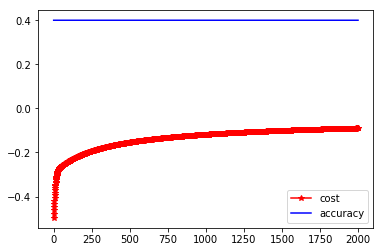

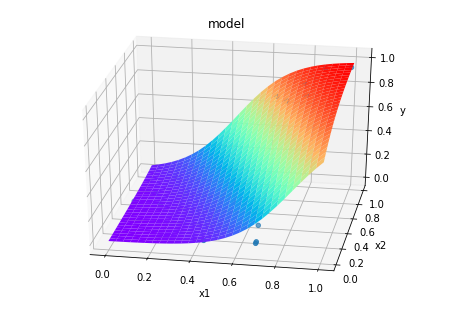

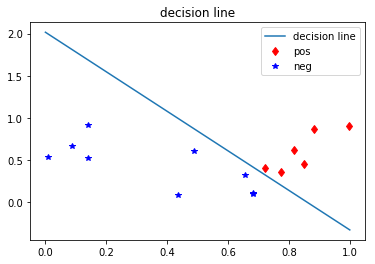

In [170]:
w = np.random.rand(1,3)

alpha = 0.01
Js = []
accs = []

for i in range(2000):
    a = logisticModel(w, x)
    grad_w = grad(a, x, y)
    w = w - alpha * grad_w
    Js.append(cost(a, y))
    accs.append(accuarcy(a, y))

plt.plot(Js,'r-*',label="cost")
plt.plot(accs,'b-',label="accuracy")
plt.legend()
plt.savefig("cost.jpg")
print("-"*40)
print("gradient descent method: w={}".format(w))
print("-"*40)    
    
plot_fig(w, x, y)

plot_decision_line(w, x, y)